## News Mood Homework

1. Measuring the most recent 100 tweets from all 5 media outlets, it appears NYTimes is the most neutral with the least amount of Tweet Polarity.
2. CBS seems to have the largest positive compound average in tweets, indicating their tweets tend to be more positive in sentiment.
3. Based on these findings, NYTimes may be shown as the best neutral news option at this time.

In [45]:
#Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use('ggplot')

from config import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [46]:
#Tweepy Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [47]:
#BBC Sentiment

bbc_twitter = "@BBC"
bbc_positive_list = []
bbc_negative_list = []
bbc_neutral_list = []
bbc_compound_list = []
bbc_sentiments = []

oldest_tweet = None
counter = 1

for x in range(5):
    bbc_public_tweets = api.user_timeline(bbc_twitter, page=x)
    
    for tweet in bbc_public_tweets:
        #print(f'Tweet {counter}: {tweet["text"]}')
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_count = counter

        bbc_compound_list.append(compound)
        bbc_positive_list.append(pos)
        bbc_neutral_list.append(neu)
        bbc_negative_list.append(neg)
        
        oldest_tweet = tweet["id"] - 1
        
        bbc_sentiments.append({"Date Created": tweet["created_at"],
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets ago": counter    
                          })
        
        counter += 1


In [48]:
bbc_sentiments_df = pd.DataFrame(bbc_sentiments)
bbc_sentiments_df.head()

,Compound,Date Created,Negative,Neutral,Positive,Tweets ago
0,0.0000,Wed Jun 13 19:03:07 +0000 2018,0.000,1.000,0.000,1
1,-0.4005,Wed Jun 13 18:28:04 +0000 2018,0.137,0.863,0.000,2
2,0.3612,Wed Jun 13 18:01:04 +0000 2018,0.000,0.839,0.161,3
3,0.6369,Wed Jun 13 16:30:31 +0000 2018,0.000,0.819,0.181,4
4,-0.4019,Wed Jun 13 16:25:17 +0000 2018,0.163,0.837,0.000,5


In [49]:
#CBS Sentiment

cbs_twitter = "@CBS"
cbs_positive_list = []
cbs_negative_list = []
cbs_neutral_list = []
cbs_compound_list = []
cbs_sentiments = []

oldest_tweet = None
counter = 1

for x in range(5):
    cbs_public_tweets = api.user_timeline(cbs_twitter, page=x)
    
    for tweet in cbs_public_tweets:
        #print(f'Tweet {counter}: {tweet["text"]}')
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_count = counter

        cbs_compound_list.append(compound)
        cbs_positive_list.append(pos)
        cbs_neutral_list.append(neu)
        cbs_negative_list.append(neg)
        
        oldest_tweet = tweet["id"] - 1
        
        cbs_sentiments.append({"Date Created": tweet["created_at"],
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets ago": counter
                          })
        
        counter += 1


In [50]:
cbs_sentiments_df = pd.DataFrame(cbs_sentiments)
cbs_sentiments_df.head()

,Compound,Date Created,Negative,Neutral,Positive,Tweets ago
0,-0.5562,Tue Jun 12 00:19:23 +0000 2018,0.315,0.551,0.134,1
1,0.5093,Mon Jun 11 22:23:06 +0000 2018,0.000,0.829,0.171,2
2,-0.2960,Mon Jun 11 19:01:38 +0000 2018,0.167,0.833,0.000,3
3,0.0000,Mon Jun 11 14:00:37 +0000 2018,0.000,1.000,0.000,4
4,0.0000,Mon Jun 11 06:19:36 +0000 2018,0.000,1.000,0.000,5


In [51]:
#CNN Sentiment

cnn_twitter = "@CNN"
cnn_positive_list = []
cnn_negative_list = []
cnn_neutral_list = []
cnn_compound_list = []
cnn_sentiments = []

oldest_tweet = None
counter = 1

for x in range(5):
    cnn_public_tweets = api.user_timeline(cnn_twitter, page=x)
    
    for tweet in cnn_public_tweets:
        #print(f'Tweet {counter}: {tweet["text"]}')
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_count = counter

        cnn_compound_list.append(compound)
        cnn_positive_list.append(pos)
        cnn_neutral_list.append(neu)
        cnn_negative_list.append(neg)
        
        oldest_tweet = tweet["id"] - 1
        
        cnn_sentiments.append({"Date Created": tweet["created_at"],
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets ago": counter
                          })
        
        counter += 1

In [52]:
cnn_sentiments_df = pd.DataFrame(cnn_sentiments)
cnn_sentiments_df.head()

,Compound,Date Created,Negative,Neutral,Positive,Tweets ago
0,0.2023,Thu Jun 14 04:16:00 +0000 2018,0.000,0.899,0.101,1
1,0.0000,Thu Jun 14 04:08:00 +0000 2018,0.000,1.000,0.000,2
2,-0.3400,Thu Jun 14 04:01:03 +0000 2018,0.165,0.726,0.109,3
3,-0.5423,Thu Jun 14 03:53:30 +0000 2018,0.163,0.837,0.000,4
4,-0.5106,Thu Jun 14 03:46:06 +0000 2018,0.163,0.837,0.000,5


In [53]:
#Fox Sentiment

fox_twitter = "@FoxNews"
fox_positive_list = []
fox_negative_list = []
fox_neutral_list = []
fox_compound_list = []
fox_sentiments = []

oldest_tweet = None
counter = 1

for x in range(5):
    fox_public_tweets = api.user_timeline(fox_twitter, page=x)
    
    for tweet in fox_public_tweets:
        #print(f'Tweet {counter}: {tweet["text"]}')
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_count = counter

        fox_compound_list.append(compound)
        fox_positive_list.append(pos)
        fox_neutral_list.append(neu)
        fox_negative_list.append(neg)
        
        oldest_tweet = tweet["id"] - 1
        
        fox_sentiments.append({"Date Created": tweet["created_at"],
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets ago": counter
                          })
        
        counter += 1

In [54]:
fox_sentiments_df = pd.DataFrame(fox_sentiments)
fox_sentiments_df.head()

,Compound,Date Created,Negative,Neutral,Positive,Tweets ago
0,-0.1779,Thu Jun 14 04:15:00 +0000 2018,0.155,0.717,0.127,1
1,0.7783,Thu Jun 14 04:15:00 +0000 2018,0.000,0.638,0.362,2
2,-0.3400,Thu Jun 14 04:07:00 +0000 2018,0.197,0.673,0.130,3
3,0.3182,Thu Jun 14 04:01:00 +0000 2018,0.000,0.897,0.103,4
4,0.0000,Thu Jun 14 03:47:45 +0000 2018,0.000,1.000,0.000,5


In [55]:
#NYTimes Sentiment

ny_twitter = "@nytimes"
ny_positive_list = []
ny_negative_list = []
ny_neutral_list = []
ny_compound_list = []
ny_sentiments = []

oldest_tweet = None
counter = 1

for x in range(5):
    ny_public_tweets = api.user_timeline(ny_twitter, page=x)
    
    for tweet in ny_public_tweets:
        #print(f'Tweet {counter}: {tweet["text"]}')
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_count = counter

        ny_compound_list.append(compound)
        ny_positive_list.append(pos)
        ny_neutral_list.append(neu)
        ny_negative_list.append(neg)
        
        oldest_tweet = tweet["id"] - 1
        
        ny_sentiments.append({"Date Created": tweet["created_at"],
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets ago": counter
                          })
        
        counter += 1

In [56]:
ny_sentiments_df = pd.DataFrame(ny_sentiments)
ny_sentiments_df.head()

,Compound,Date Created,Negative,Neutral,Positive,Tweets ago
0,0.0000,Thu Jun 14 04:21:03 +0000 2018,0.000,1.000,0.000,1
1,0.0000,Thu Jun 14 04:10:20 +0000 2018,0.000,1.000,0.000,2
2,0.2960,Thu Jun 14 04:02:04 +0000 2018,0.118,0.699,0.183,3
3,0.8074,Thu Jun 14 03:47:07 +0000 2018,0.000,0.722,0.278,4
4,0.5267,Thu Jun 14 03:32:01 +0000 2018,0.085,0.704,0.211,5


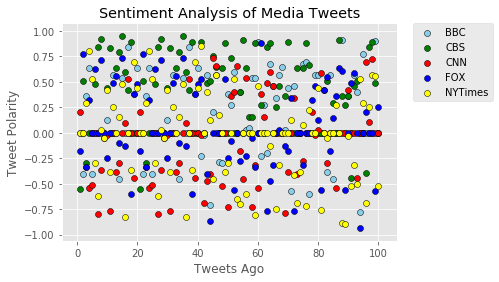

In [57]:
# Create Sentiment plot
bbc_x_vals = bbc_sentiments_df["Tweets ago"]
bbc_y_vals = bbc_sentiments_df["Compound"]
plt.scatter(bbc_x_vals, bbc_y_vals, marker = "o", color = "skyblue", edgecolors = "black", label = "BBC")

cbs_x_vals = cbs_sentiments_df["Tweets ago"]
cbs_y_vals = cbs_sentiments_df["Compound"]
plt.scatter(cbs_x_vals, cbs_y_vals, marker = "o", color = "green", edgecolors = "black",  label = "CBS")

cnn_x_vals = cnn_sentiments_df["Tweets ago"]
cnn_y_vals = cnn_sentiments_df["Compound"]
plt.scatter(cnn_x_vals, cnn_y_vals, marker = "o", color = "red", edgecolors = "black", label = "CNN")

fox_x_vals = fox_sentiments_df["Tweets ago"]
fox_y_vals = fox_sentiments_df["Compound"]
plt.scatter(fox_x_vals, fox_y_vals, marker = "o", color = "blue", edgecolors = "black", label = "FOX")

ny_x_vals = ny_sentiments_df["Tweets ago"]
ny_y_vals = ny_sentiments_df["Compound"]
plt.scatter(ny_x_vals, ny_y_vals, marker = "o", color = "yellow", edgecolors = "black", label = "NYTimes")

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("Sentiment Analysis of Media Tweets.png")




In [58]:
#Identify Sentiment mean
#Only the compound value
bbc_mean = bbc_sentiments_df["Compound"].mean()

cbs_mean = cbs_sentiments_df["Compound"].mean()

cnn_mean = cnn_sentiments_df["Compound"].mean()

fox_mean = fox_sentiments_df["Compound"].mean()

ny_mean = ny_sentiments_df["Compound"].mean()

print(bbc_mean)
print(cbs_mean)
print(cnn_mean)
print(fox_mean)
print(ny_mean)

0.16869299999999998
0.3593549999999999
-0.070491
0.056334
-0.029197999999999995


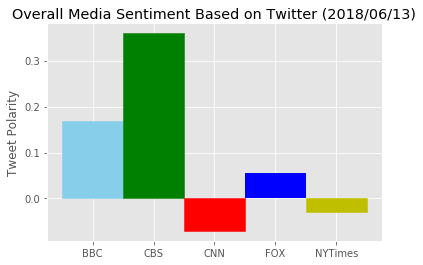

In [59]:
# Create a bar chart based upon the above data
news_twitter = ["BBC", "CBS", "CNN", "FOX", "NYTimes"]
news_mean = [bbc_mean, cbs_mean, cnn_mean, fox_mean, ny_mean]

# Set the color for each news outlet
sentiment_bar = plt.bar(news_twitter, news_mean, color="b", width = 1.0, align="center")
sentiment_bar[0].set_color('skyblue')
sentiment_bar[1].set_color('g')
sentiment_bar[2].set_color('r')
sentiment_bar[4].set_color('y')

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in news_twitter]
plt.xticks(tick_locations, news_twitter)
#plt.xlim(-0.75, len(news_twitter)-0.25)
#plt.ylim(min(news_mean) + 0.05, max(news_mean) + 0.05)

now = datetime.now()
now = now.strftime("%Y/%m/%d")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")
plt.ylabel("Tweet Polarity")

# Save figure 
plt.savefig("Overall_Media_Sentiment_Based_on_Twitter.png")